# Ames Housing Price Prediction
## Advanced Apex Project - Real Estate Price Modeling

**Team:** The Outliers  
**Institution:** BITS Pilani - Digital Campus  
**Course:** Advanced Apex Project 1  
**Term:** First Trimester 2025-26  
**Supervisor:** Dr. Bharathi Dasari  
**Submission Date:** November 2025

---

### Team Members

| Student Name | BITS ID |
|--------------|----------|
| Anik Das | 2025EM1100026 |
| Adeetya Wadikar | 2025EM1100384 |
| Tushar Nishane | 2025EM1100306 |

---

## Executive Summary

### Problem Statement

Accurate real estate valuation is essential for buyers, sellers, and financial institutions. Traditional valuation methods can be subjective and time-consuming. This project develops machine learning models to predict house sale prices objectively based on property characteristics.

### Business Objective

Develop a predictive regression model that estimates residential property sale prices with high accuracy. The model should help stakeholders:

- **Buyers:** Assess fair market value before purchase
- **Sellers:** Set competitive listing prices
- **Investors:** Identify undervalued properties
- **Lenders:** Support loan underwriting decisions

### Dataset

**Name:** Ames Housing Dataset  
**Source:** [Kaggle - Ames Housing Dataset](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset)  
**Size:** 2,930 residential property sales transactions  
**Features:** 82 variables describing physical characteristics, quality ratings, location attributes, and amenities  
**Target Variable:** SalePrice (in USD)  
**Time Period:** Properties sold in Ames, Iowa (2006-2010)

---

## Table of Contents

### Phase 1: Data Acquisition
1.1 Environment Setup  
1.2 Data Loading  
1.3 Initial Data Inspection  
1.4 Schema Validation  
1.5 Data Quality Assessment

### Phase 2: Preprocessing & Exploratory Analysis
2.1 Summary Statistics  
2.2 Missing Value Analysis  
2.3 Missing Value Treatment  
2.4 Univariate Analysis  
2.5 Low-Variance Feature Removal  
2.6 Bivariate Analysis & Correlations  
2.7 Outlier Detection

### Phase 3: Feature Engineering
3.1 Feature Creation  
3.2 Categorical Encoding  
3.3 Feature Importance Analysis

### Phase 4: Modeling & Evaluation
4.1 Data Preparation  
4.2 Simple Linear Regression  
4.3 Multiple Linear Regression  
4.4 Ridge Regression  
4.5 Model Comparison

### Phase 5: Visualization & Storytelling
5.1 Dashboard Visualizations  
5.2 Key Insights  
5.3 Conclusions & Recommendations

---

# Phase 1: Data Acquisition

**Objective:** Acquire the Ames Housing dataset and perform initial validation to ensure data integrity before proceeding to analysis.

---

## 1.1 Environment Setup

Import all necessary Python libraries for data manipulation, statistical analysis, visualization, and machine learning.

In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistical libraries
from scipy import stats

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configuration
import warnings
# Filter only FutureWarning and DeprecationWarning to keep important warnings visible
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.2.3
NumPy version: 1.26.4


---

## 1.2 Data Loading

The Ames Housing dataset was downloaded from Kaggle and stored in the project's data directory.

**Data Source:** Kaggle - Ames Housing Dataset  
**Citation:** Shashank Necrothapa. (n.d.). Ames Housing Dataset. Kaggle. https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

In [2]:
# Load the dataset using pathlib for robust path handling
notebook_dir = Path().resolve()
data_path = notebook_dir.parent / "data" / "AmesHousing.csv"

# Fallback to relative path if absolute path doesn't exist
if not data_path.exists():
    data_path = "../data/AmesHousing.csv"

df = pd.read_csv(data_path)

# Display basic information
print(f"Dataset loaded from: {data_path}")
print(f"Dataset Dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few records
print("\nFirst 5 Records:")
df.head()

Dataset loaded from: /workspaces/real-state-apex-project-final/data/AmesHousing.csv
Dataset Dimensions: 2,930 rows × 82 columns
Memory Usage: 6.92 MB

First 5 Records:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.00,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.00,Unf,0.00,441.00,1080.00,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.00,0.00,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.00,Fin,2.00,528.00,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.00,Gd,TA,CBlock,TA,TA,No,ALQ,1065.00,Unf,0.00,1045.00,2110.00,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.00,0.00,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.00,Fin,2.00,522.00,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


---

## 1.3 Initial Data Inspection

Perform a high-level inspection to understand the dataset structure, identify data types, and spot any immediate quality concerns.

In [3]:
# Dataset structure overview
print("Dataset Structure Overview:\n")
df.info()

print("\n" + "="*70)
print("Data Type Summary:")
print("="*70)
print(df.dtypes.value_counts())

print("\n" + "="*70)
print("Column Distribution:")
print("="*70)
print(f"Numerical columns (int64): {len(df.select_dtypes(include=['int64']).columns)}")
print(f"Numerical columns (float64): {len(df.select_dtypes(include=['float64']).columns)}")
print(f"Categorical columns (object): {len(df.select_dtypes(include=['object']).columns)}")

Dataset Structure Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null 

---

## 1.4 Schema Validation

Verify that all expected columns are present and properly formatted.

In [4]:
# Display all column names
print(f"Total Features: {len(df.columns)}\n")
print("All Column Names:")
print("="*70)

# Print in organized format (4 columns)
col_list = df.columns.tolist()
for i in range(0, len(col_list), 4):
    row = col_list[i:i+4]
    print(f"{i+1:2d}-{i+len(row):2d}: " + " | ".join(f"{col:20s}" for col in row))

print("\n" + "="*70)
print("Key Columns Verified:")
print("="*70)
important_cols = ['Order', 'PID', 'SalePrice', 'Gr Liv Area', 'Overall Qual', 'Neighborhood']
for col in important_cols:
    status = "Present" if col in df.columns else "Missing"
    print(f"  {col}: {status}")

Total Features: 82

All Column Names:
 1- 4: Order                | PID                  | MS SubClass          | MS Zoning           
 5- 8: Lot Frontage         | Lot Area             | Street               | Alley               
 9-12: Lot Shape            | Land Contour         | Utilities            | Lot Config          
13-16: Land Slope           | Neighborhood         | Condition 1          | Condition 2         
17-20: Bldg Type            | House Style          | Overall Qual         | Overall Cond        
21-24: Year Built           | Year Remod/Add       | Roof Style           | Roof Matl           
25-28: Exterior 1st         | Exterior 2nd         | Mas Vnr Type         | Mas Vnr Area        
29-32: Exter Qual           | Exter Cond           | Foundation           | Bsmt Qual           
33-36: Bsmt Cond            | Bsmt Exposure        | BsmtFin Type 1       | BsmtFin SF 1        
37-40: BsmtFin Type 2       | BsmtFin SF 2         | Bsmt Unf SF          | Total Bsmt SF

---

## 1.5 Data Quality Assessment

Conduct initial quality checks to identify missing values, duplicate records, and verify the target variable integrity.

In [5]:
# Comprehensive quality checks
print("Data Quality Assessment:")
print("="*70)

# Check for missing values
total_missing = df.isnull().sum().sum()
cols_with_missing = df.isnull().any().sum()
print(f"\nMissing Value Check:")
print(f"  Total missing values: {total_missing:,}")
print(f"  Columns with missing data: {cols_with_missing} out of {len(df.columns)}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Check:")
print(f"  Duplicate rows: {duplicates}")

# Verify target variable
print(f"\nTarget Variable (SalePrice) Verification:")
print(f"  Missing values: {df['SalePrice'].isnull().sum()}")
print(f"  Minimum: ${df['SalePrice'].min():,}")
print(f"  Maximum: ${df['SalePrice'].max():,}")
print(f"  Mean: ${df['SalePrice'].mean():,.2f}")
print(f"  Median: ${df['SalePrice'].median():,.2f}")
print(f"  Standard Deviation: ${df['SalePrice'].std():,.2f}")

Data Quality Assessment:

Missing Value Check:
  Total missing values: 15,749
  Columns with missing data: 27 out of 82

Duplicate Check:
  Duplicate rows: 0

Target Variable (SalePrice) Verification:
  Missing values: 0
  Minimum: $12,789
  Maximum: $755,000
  Mean: $180,796.06
  Median: $160,000.00
  Standard Deviation: $79,886.69


In [6]:
# Create schema summary table
schema_summary = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': df.count().values,
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

# Sort by null percentage to see problematic columns first
schema_summary = schema_summary.sort_values('Null_Percentage', ascending=False)

print("Schema Summary (Top 20 columns by missing data):")
print("="*90)
schema_summary.head(20)

Schema Summary (Top 20 columns by missing data):


,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values
73,Pool QC,object,13,2917,99.56,4
75,Misc Feature,object,106,2824,96.38,5
7,Alley,object,198,2732,93.24,2
74,Fence,object,572,2358,80.48,4
26,Mas Vnr Type,object,1155,1775,60.58,4
58,Fireplace Qu,object,1508,1422,48.53,5
4,Lot Frontage,float64,2440,490,16.72,128
65,Garage Cond,object,2771,159,5.43,5
61,Garage Finish,object,2771,159,5.43,3
60,Garage Yr Blt,float64,2771,159,5.43,103


---

### Data Dictionary - Key Features

**Target Variable**

| Feature | Description | Type | Range |
|---------|-------------|------|-------|
| SalePrice | Property sale price in USD | Continuous | $12,789 - $755,000 |

**Top Predictors (by correlation with SalePrice)**

| Feature | Description | Type |
|---------|-------------|------|
| Overall Qual | Overall material and finish quality (1-10 scale) | Ordinal |
| Gr Liv Area | Above grade living area in square feet | Continuous |
| Garage Cars | Garage capacity (0-4 cars) | Discrete |
| Total Bsmt SF | Total basement area in square feet | Continuous |
| Year Built | Original construction year | Discrete |

**Feature Categories (82 total features)**

1. **Physical Attributes (28 features):** Size measurements, floor areas, room counts
2. **Quality & Condition Ratings (11 features):** Overall quality, condition, kitchen quality
3. **Location Features (8 features):** Neighborhood, zoning, lot configuration
4. **Amenities & Features (35 features):** Garage, basement, fireplace, pool, porch

---

### Phase 1 Summary

**Data Acquired:**
- 2,930 residential property records with 82 features
- Dataset loaded from Kaggle with proper citation
- No duplicate records identified
- Target variable (SalePrice) has no missing values
- 27 features contain missing values (to be addressed in Phase 2)

**Initial Observations:**
- Mix of numerical (39) and categorical (43) features
- Some features have high missingness (>50%) - candidates for removal
- Price range ($12,789 - $755,000) suggests diverse property types

---

# Phase 2: Preprocessing & Exploratory Analysis

**Objective:** Transform raw data into a clean, analysis-ready format through systematic preprocessing and conduct comprehensive exploratory analysis.

---

## 2.1 Summary Statistics Overview

Compute comprehensive descriptive statistics for all numerical features to understand central tendency, spread, and potential data quality issues.

In [7]:
# Summary statistics for numerical features
print("="*70)
print("SUMMARY STATISTICS - NUMERICAL FEATURES")
print("="*70)

print("\nDescriptive Statistics for All Numerical Features:")
print(df.describe().T)

print("\n" + "="*70)
print("TARGET VARIABLE (SalePrice) STATISTICS")
print("="*70)
print(df['SalePrice'].describe())

print(f"\nPrice Range: ${df['SalePrice'].min():,} to ${df['SalePrice'].max():,}")
print(f"Price Spread (IQR): ${df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25):,.0f}")

print("\n" + "="*70)
print("KEY OBSERVATIONS")
print("="*70)
print("1. SalePrice Distribution:")
print(f"   - Mean (${df['SalePrice'].mean():,.0f}) > Median (${df['SalePrice'].median():,.0f})")
print("   - This indicates a right-skewed distribution (some expensive homes pulling mean up)")

print("\n2. Living Area Variability:")
print(f"   - Range: {df['Gr Liv Area'].min()} to {df['Gr Liv Area'].max()} sq ft")
print(f"   - Coefficient of Variation: {(df['Gr Liv Area'].std()/df['Gr Liv Area'].mean())*100:.1f}%")

print("\n3. Age Distribution:")
print(f"   - Newest: {df['Year Built'].max()}")
print(f"   - Oldest: {df['Year Built'].min()}")

SUMMARY STATISTICS - NUMERICAL FEATURES

Descriptive Statistics for All Numerical Features:
                  count         mean          std          min          25%  \
Order           2930.00      1465.50       845.96         1.00       733.25   
PID             2930.00 714464496.99 188730844.65 526301100.00 528477022.50   
MS SubClass     2930.00        57.39        42.64        20.00        20.00   
Lot Frontage    2440.00        69.22        23.37        21.00        58.00   
Lot Area        2930.00     10147.92      7880.02      1300.00      7440.25   
Overall Qual    2930.00         6.09         1.41         1.00         5.00   
Overall Cond    2930.00         5.56         1.11         1.00         5.00   
Year Built      2930.00      1971.36        30.25      1872.00      1954.00   
Year Remod/Add  2930.00      1984.27        20.86      1950.00      1965.00   
Mas Vnr Area    2907.00       101.90       179.11         0.00         0.00   
BsmtFin SF 1    2929.00       442.63   

---

## 2.2 Missing Value Analysis

Identify features with missing values and understand patterns to determine appropriate treatment strategies.

In [8]:
# Calculate missing value statistics
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Feature': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_pct.values
})

# Filter to only features with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0]
missing_df = missing_df.sort_values('Missing_Percentage', ascending=False)

print(f"Features with Missing Values: {len(missing_df)} out of {len(df.columns)}")
print("\nTop 15 Features with Most Missing Data:")
print("="*70)
missing_df.head(15)

Features with Missing Values: 27 out of 82

Top 15 Features with Most Missing Data:


,Feature,Missing_Count,Missing_Percentage
73,Pool QC,2917,99.56
75,Misc Feature,2824,96.38
7,Alley,2732,93.24
74,Fence,2358,80.48
26,Mas Vnr Type,1775,60.58
58,Fireplace Qu,1422,48.53
4,Lot Frontage,490,16.72
65,Garage Cond,159,5.43
64,Garage Qual,159,5.43
61,Garage Finish,159,5.43


### Missing Value Visualization

Visual analysis helps identify patterns - whether values are missing completely at random (MCAR), at random (MAR), or not at random (MNAR).

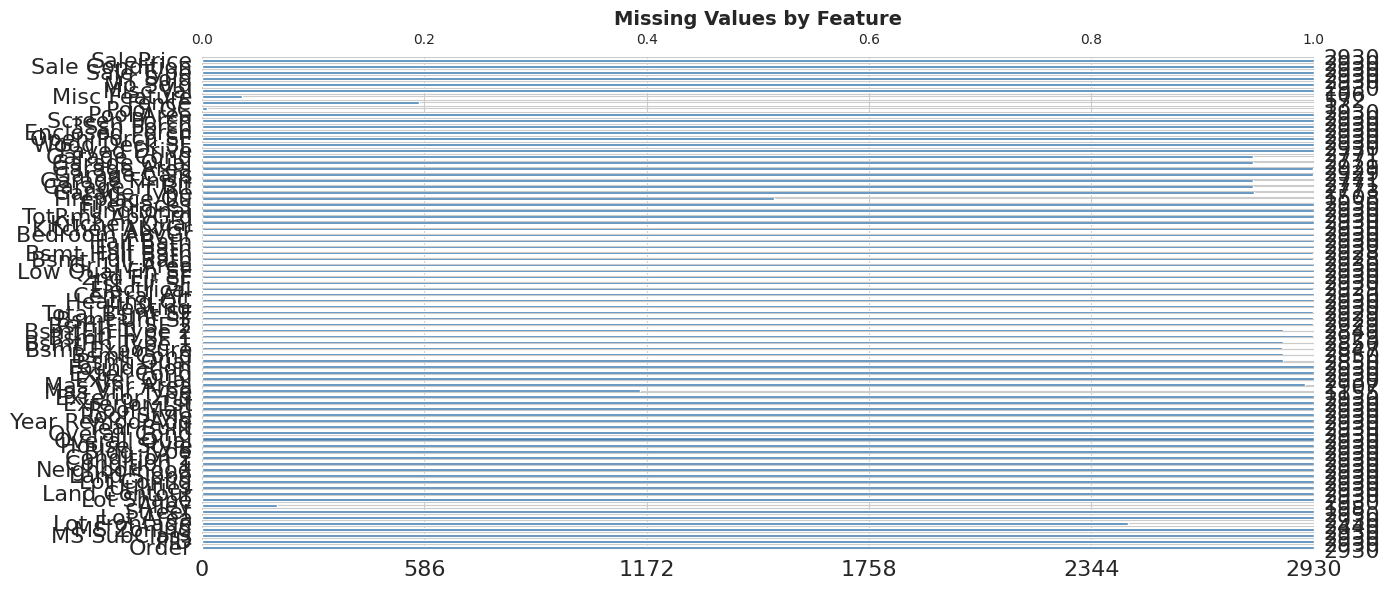

In [9]:
# Visualize missing values (msno.bar creates its own figure, no need for plt.figure)
msno.bar(df, figsize=(14, 6), color='steelblue')
plt.title('Missing Values by Feature', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 2.3 Missing Value Treatment

We apply a systematic 4-step strategy to handle missing values:

**Step 1 - Drop High-Missingness Features (>50%):**  
Features with more than 50% missing data provide limited predictive value and are removed.

**Step 2 - Fill "None" for Categorical Features:**  
For features like Fireplace Quality where missing means "no fireplace exists", we fill with "None".

**Step 3 - Fill 0 for Related Numerical Features:**  
For numerical features tied to absent amenities (e.g., Garage Area when no garage), we fill with 0.

**Step 4 - Impute Remaining Values:**  
- Numerical: Median imputation (robust to outliers)
- Categorical: Mode imputation (most frequent value)

In [10]:
# Step 1: Drop high-missingness features (>50%) - verify programmatically
MISSING_THRESHOLD = 50  # percentage

print("Step 1: Identifying and dropping features with >50% missing data:")
print("="*70)

# Programmatically identify columns exceeding threshold
high_missing_cols = []
for col in df.columns:
    pct = df[col].isnull().sum() / len(df) * 100
    if pct > MISSING_THRESHOLD:
        high_missing_cols.append(col)
        print(f"  [DROP] {col}: {pct:.1f}% missing")
    elif pct > 40:  # Show columns close to threshold but not dropped
        print(f"  [KEEP] {col}: {pct:.1f}% missing (below threshold)")

if high_missing_cols:
    df = df.drop(columns=high_missing_cols)
    print(f"\nDropped {len(high_missing_cols)} columns: {high_missing_cols}")
else:
    print("\nNo columns exceed the 50% missing threshold.")

print(f"Remaining features: {df.shape[1]}")

Step 1: Identifying and dropping features with >50% missing data:
  [DROP] Alley: 93.2% missing
  [DROP] Mas Vnr Type: 60.6% missing
  [KEEP] Fireplace Qu: 48.5% missing (below threshold)
  [DROP] Pool QC: 99.6% missing
  [DROP] Fence: 80.5% missing
  [DROP] Misc Feature: 96.4% missing

Dropped 5 columns: ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']
Remaining features: 77


In [11]:
# Step 2: Fill "None" for categorical features where missing means "not present"
categorical_none_fill = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
                         'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 
                         'Garage Qual', 'Garage Cond']

print("Step 2: Filling 'None' for categorical features:")
for col in categorical_none_fill:
    if col in df.columns and df[col].isnull().sum() > 0:
        before = df[col].isnull().sum()
        df[col] = df[col].fillna('None')
        print(f"  - {col}: {before} values filled with 'None'")

Step 2: Filling 'None' for categorical features:
  - Bsmt Qual: 80 values filled with 'None'
  - Bsmt Cond: 80 values filled with 'None'
  - Bsmt Exposure: 83 values filled with 'None'
  - BsmtFin Type 1: 80 values filled with 'None'
  - BsmtFin Type 2: 81 values filled with 'None'
  - Garage Type: 157 values filled with 'None'
  - Garage Finish: 159 values filled with 'None'
  - Garage Qual: 159 values filled with 'None'
  - Garage Cond: 159 values filled with 'None'


In [12]:
# Step 3: Fill 0 for numerical features where missing means "not present"
# EXCEPT for Garage Yr Blt which should use median (year 0 is semantically incorrect)
numerical_zero_fill = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
                       'Garage Cars', 'Garage Area']

print("Step 3: Filling 0 for numerical features (where 0 means 'not present'):")
for col in numerical_zero_fill:
    if col in df.columns and df[col].isnull().sum() > 0:
        before = df[col].isnull().sum()
        df[col] = df[col].fillna(0)
        print(f"  - {col}: {before} values filled with 0")

# Handle Garage Yr Blt separately - use median of existing garages (year 0 is meaningless)
if 'Garage Yr Blt' in df.columns and df['Garage Yr Blt'].isnull().sum() > 0:
    before = df['Garage Yr Blt'].isnull().sum()
    # Use median year from houses that have garages
    median_garage_yr = df[df['Garage Yr Blt'].notna()]['Garage Yr Blt'].median()
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(median_garage_yr)
    print(f"  - Garage Yr Blt: {before} values filled with median ({median_garage_yr:.0f})")

Step 3: Filling 0 for numerical features (where 0 means 'not present'):
  - Mas Vnr Area: 23 values filled with 0
  - BsmtFin SF 1: 1 values filled with 0
  - BsmtFin SF 2: 1 values filled with 0
  - Bsmt Unf SF: 1 values filled with 0
  - Total Bsmt SF: 1 values filled with 0
  - Bsmt Full Bath: 2 values filled with 0
  - Bsmt Half Bath: 2 values filled with 0
  - Garage Cars: 1 values filled with 0
  - Garage Area: 1 values filled with 0
  - Garage Yr Blt: 159 values filled with median (1979)


In [13]:
# Step 4: Impute remaining missing values
print("Step 4: Imputing remaining missing values:")

# Numerical columns - fill with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        before = df[col].isnull().sum()
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"  - {col}: {before} values filled with median ({median_val:.1f})")

# Categorical columns - fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        before = df[col].isnull().sum()
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"  - {col}: {before} values filled with mode ('{mode_val}')")

Step 4: Imputing remaining missing values:
  - Lot Frontage: 490 values filled with median (68.0)
  - Electrical: 1 values filled with mode ('SBrkr')
  - Fireplace Qu: 1422 values filled with mode ('Gd')


In [14]:
# Verify all missing values have been handled
remaining_missing = df.isnull().sum().sum()
cols_with_missing = df.isnull().any().sum()

print("\n" + "="*70)
print("MISSING VALUE TREATMENT - VERIFICATION")
print("="*70)
print(f"Total missing values remaining: {remaining_missing}")
print(f"Columns with missing values: {cols_with_missing}")

if remaining_missing == 0:
    print("\nAll missing values successfully handled.")
    print(f"Dataset is now 100% complete and ready for analysis.")
print("="*70)
print(f"Final dataset shape: {df.shape}")


MISSING VALUE TREATMENT - VERIFICATION
Total missing values remaining: 0
Columns with missing values: 0

All missing values successfully handled.
Dataset is now 100% complete and ready for analysis.
Final dataset shape: (2930, 77)


---

## 2.4 Univariate Analysis

Univariate analysis examines one variable at a time to understand its distribution characteristics.

**What we look for:**
- **Central Tendency:** Mean and median values
- **Spread:** Standard deviation and interquartile range (IQR)
- **Shape:** Skewness - whether the distribution is symmetric or has a long tail

**Why it matters:**
- Normal distributions work well with most statistical models
- High skewness may require transformation (e.g., log transformation)
- Understanding each feature individually helps identify data quality issues

In [15]:
# Select numerical columns for analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Order', 'PID']]

print(f"Analyzing {len(numeric_cols)} numerical features")
print("\nFirst 10 numerical features:")
for i, col in enumerate(numeric_cols[:10], 1):
    print(f"  {i:2d}. {col}")

Analyzing 37 numerical features

First 10 numerical features:
   1. MS SubClass
   2. Lot Frontage
   3. Lot Area
   4. Overall Qual
   5. Overall Cond
   6. Year Built
   7. Year Remod/Add
   8. Mas Vnr Area
   9. BsmtFin SF 1
  10. BsmtFin SF 2


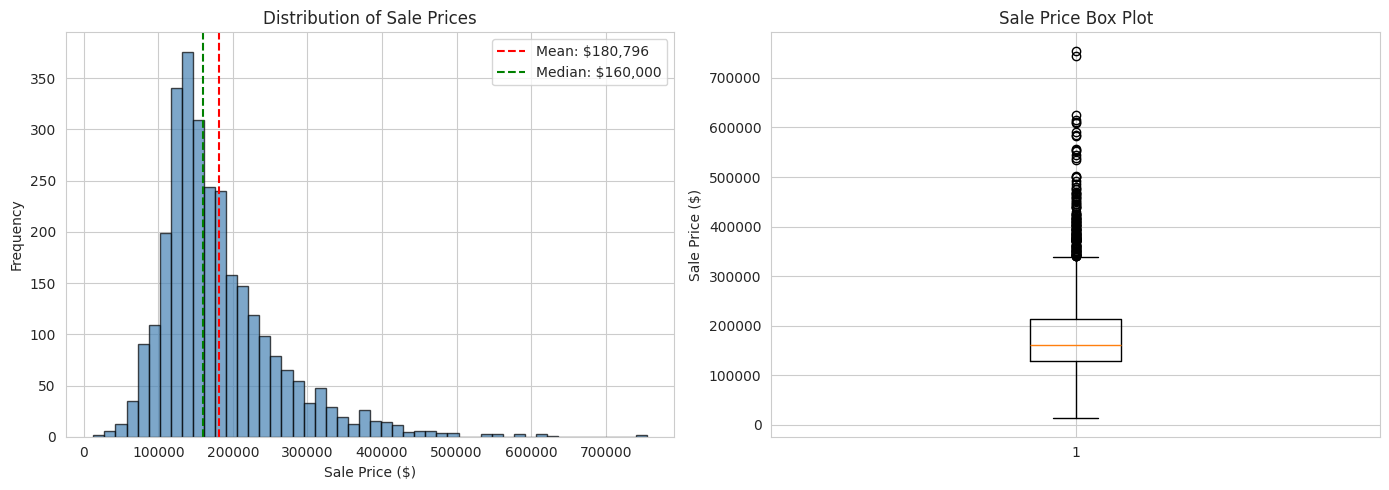


SalePrice Skewness: 1.74
Interpretation: Positive skewness indicates right-skewed distribution (long tail towards higher prices)


In [16]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['SalePrice'].mean(), color='red', linestyle='--', label=f'Mean: ${df["SalePrice"].mean():,.0f}')
axes[0].axvline(df['SalePrice'].median(), color='green', linestyle='--', label=f'Median: ${df["SalePrice"].median():,.0f}')
axes[0].set_xlabel('Sale Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sale Prices')
axes[0].legend()

# Box plot
axes[1].boxplot(df['SalePrice'], vert=True)
axes[1].set_ylabel('Sale Price ($)')
axes[1].set_title('Sale Price Box Plot')

plt.tight_layout()
plt.show()

# Statistics
skewness = stats.skew(df['SalePrice'])
print(f"\nSalePrice Skewness: {skewness:.2f}")
print("Interpretation: Positive skewness indicates right-skewed distribution (long tail towards higher prices)")

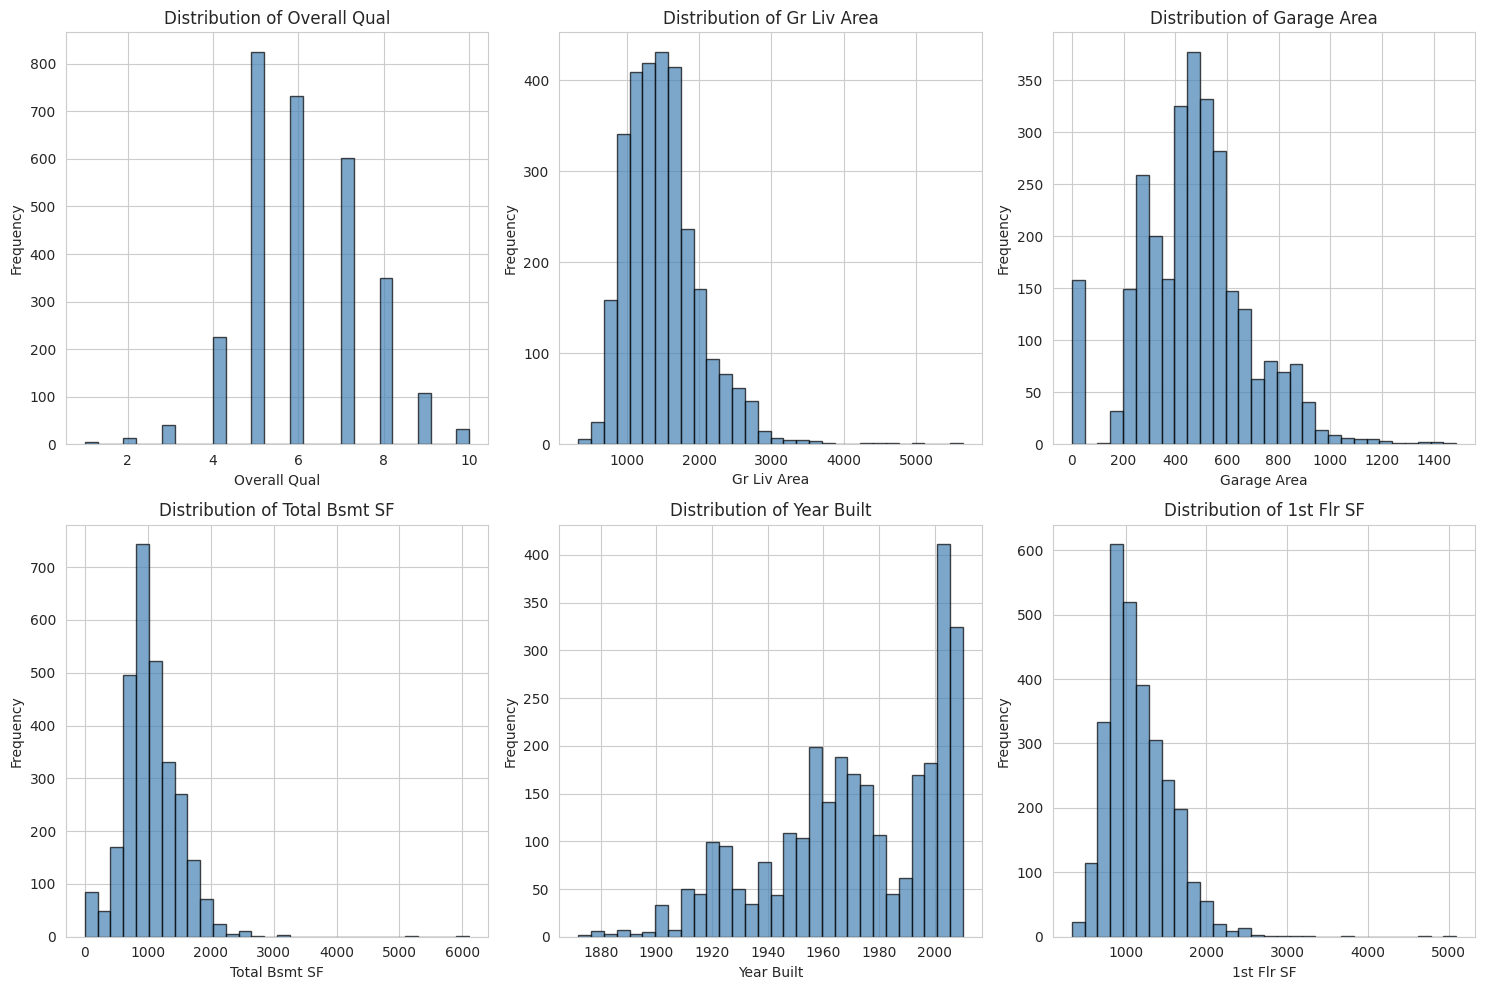

In [17]:
# Visualize key numerical features
key_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built', '1st Flr SF']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(key_features):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---

## 2.5 Low-Variance Feature Removal

Features dominated by a single category provide little predictive power and should be removed.

**Why remove low-variance features:**
- If 95%+ of observations have the same value, the feature cannot distinguish between different outcomes
- Example: "Street" type is "Pave" for 99.6% of houses - knowing street type doesn't help predict price
- Removing these features reduces model complexity and improves interpretability

In [18]:
# Identify and remove low-variance categorical features
low_var_cols = ['Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Land Slope']

print(f"Dropping {len(low_var_cols)} low-variance features:\n")
for col in low_var_cols:
    if col in df.columns:
        dominant = df[col].value_counts().index[0]
        pct = (df[col].value_counts().iloc[0] / len(df)) * 100
        print(f"  - {col:15s}: {pct:5.1f}% are '{dominant}'")

df = df.drop(columns=[c for c in low_var_cols if c in df.columns])
print(f"\nNew shape: {df.shape}")

Dropping 6 low-variance features:

  - Street         :  99.6% are 'Pave'
  - Utilities      :  99.9% are 'AllPub'
  - Condition 2    :  99.0% are 'Norm'
  - Roof Matl      :  98.5% are 'CompShg'
  - Heating        :  98.5% are 'GasA'
  - Land Slope     :  95.2% are 'Gtl'

New shape: (2930, 71)


---

## 2.6 Bivariate Analysis & Correlations

Bivariate analysis examines relationships between two variables - specifically, how each feature relates to the target variable (SalePrice).

**Pearson Correlation Coefficient (r):**

$r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2 \sum(y_i - \bar{y})^2}}$

- Measures the strength and direction of linear relationship between two variables
- Range: -1 to +1
- $r = +1$: Perfect positive correlation
- $r = 0$: No linear relationship
- $r = -1$: Perfect negative correlation

**Interpretation Guidelines:**
- $|r| > 0.7$: Strong correlation - likely important predictor
- $0.4 < |r| < 0.7$: Moderate correlation - potentially useful
- $|r| < 0.4$: Weak correlation - limited predictive value for linear models

In [19]:
# Calculate correlation with SalePrice
corr_matrix = df.corr(numeric_only=True)
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

print("Top 15 Features Correlated with SalePrice:\n")
print(saleprice_corr.head(15))

Top 15 Features Correlated with SalePrice:

SalePrice        1.00
Overall Qual     0.80
Gr Liv Area      0.71
Garage Cars      0.65
Garage Area      0.64
Total Bsmt SF    0.63
1st Flr SF       0.62
Year Built       0.56
Full Bath        0.55
Year Remod/Add   0.53
Garage Yr Blt    0.51
Mas Vnr Area     0.50
TotRms AbvGrd    0.50
Fireplaces       0.47
BsmtFin SF 1     0.43
Name: SalePrice, dtype: float64


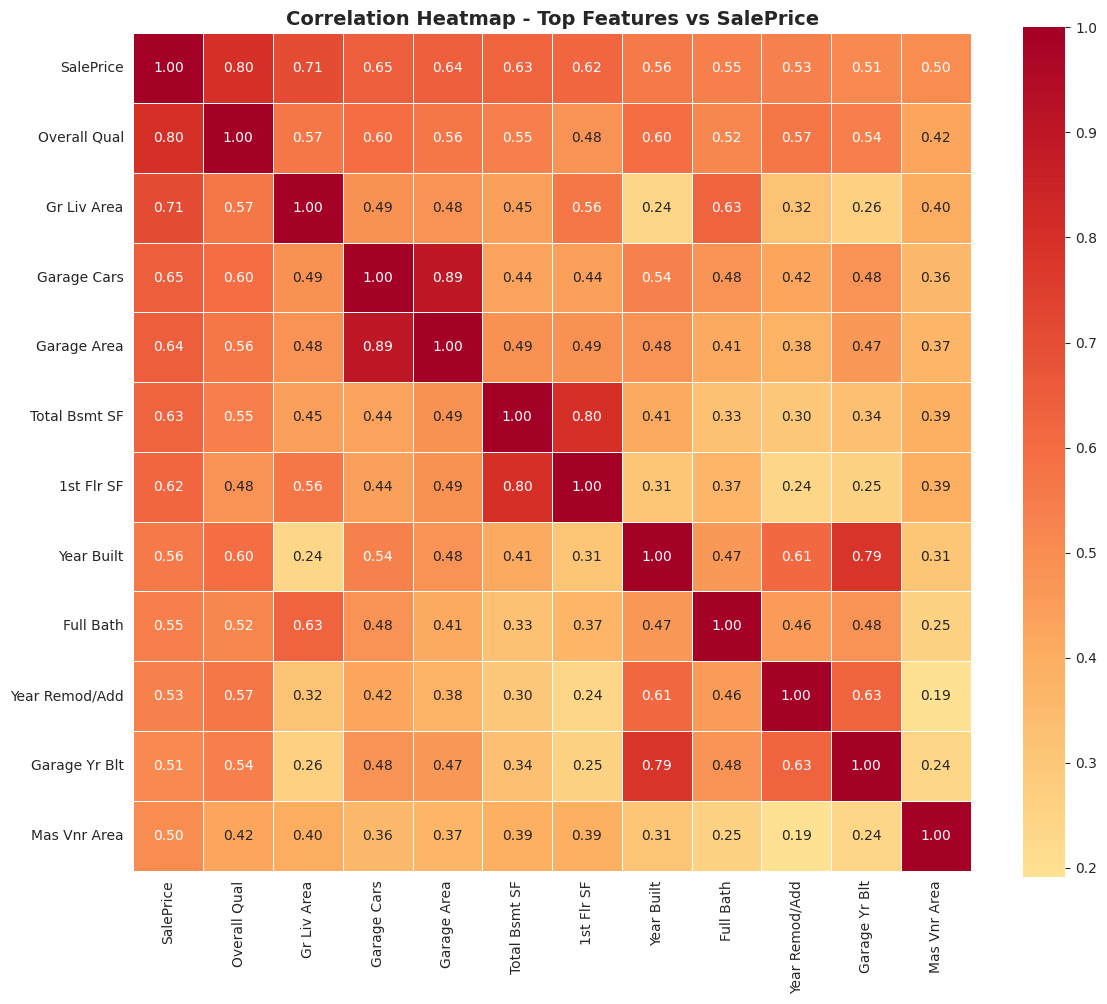

In [20]:
# Correlation heatmap for top features
top_corr_features = saleprice_corr.head(12).index.tolist()
corr_subset = df[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f',
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap - Top Features vs SalePrice', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

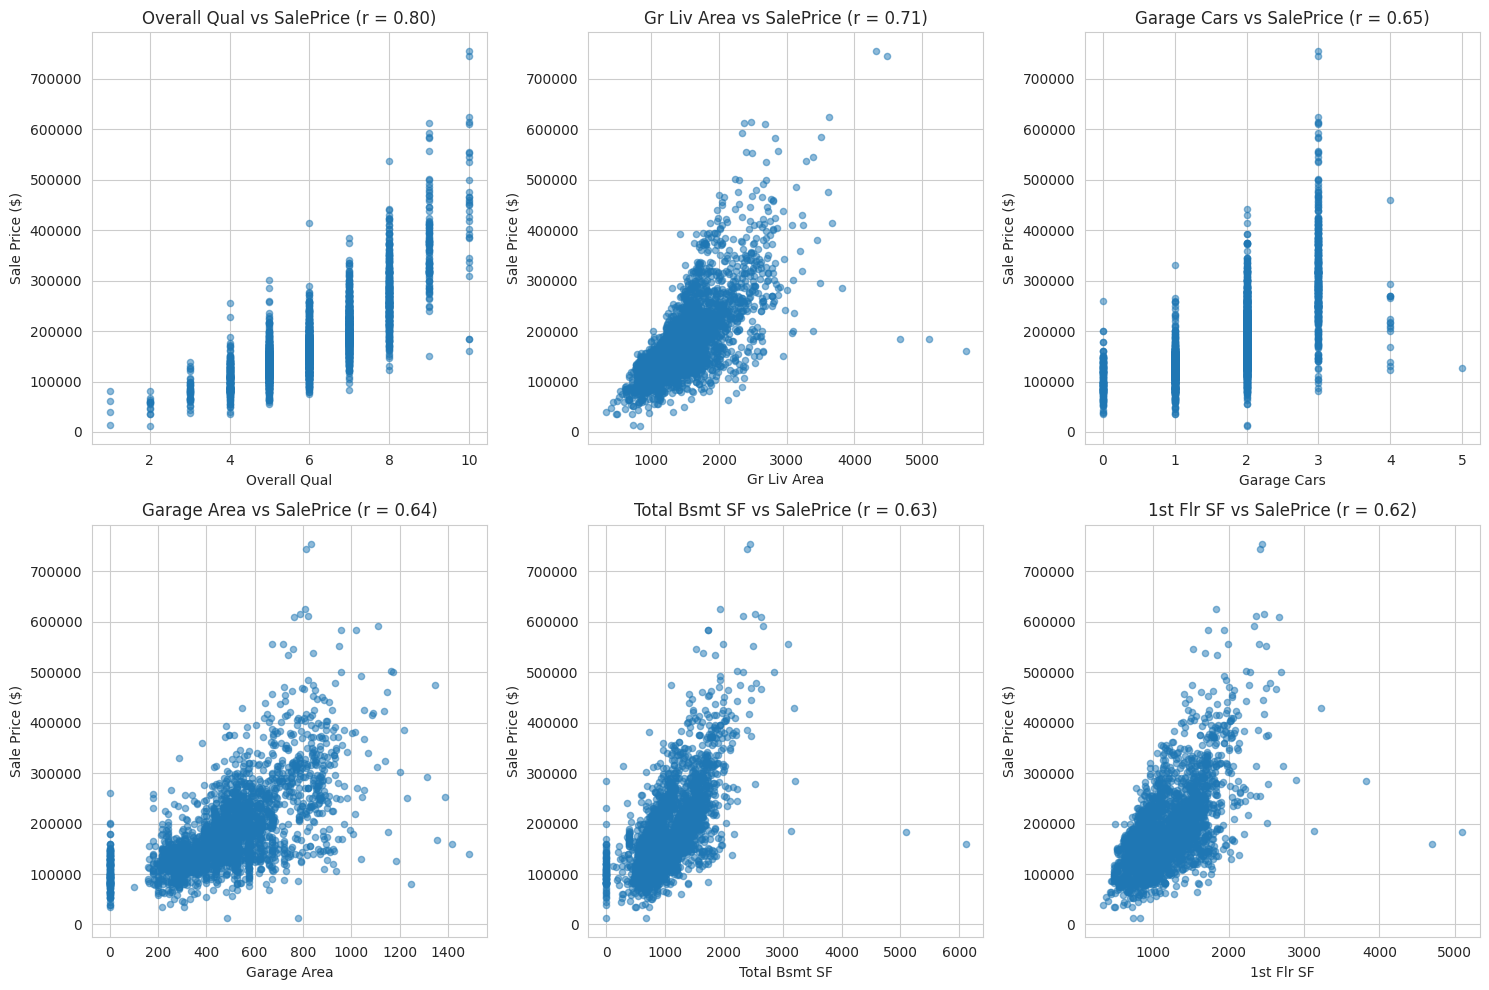

In [21]:
# Scatter plots of top predictors vs SalePrice
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

top_predictors = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']

for i, col in enumerate(top_predictors):
    axes[i].scatter(df[col], df['SalePrice'], alpha=0.5, s=20)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Sale Price ($)')
    corr = df[[col, 'SalePrice']].corr().iloc[0,1]
    axes[i].set_title(f'{col} vs SalePrice (r = {corr:.2f})')

plt.tight_layout()
plt.show()

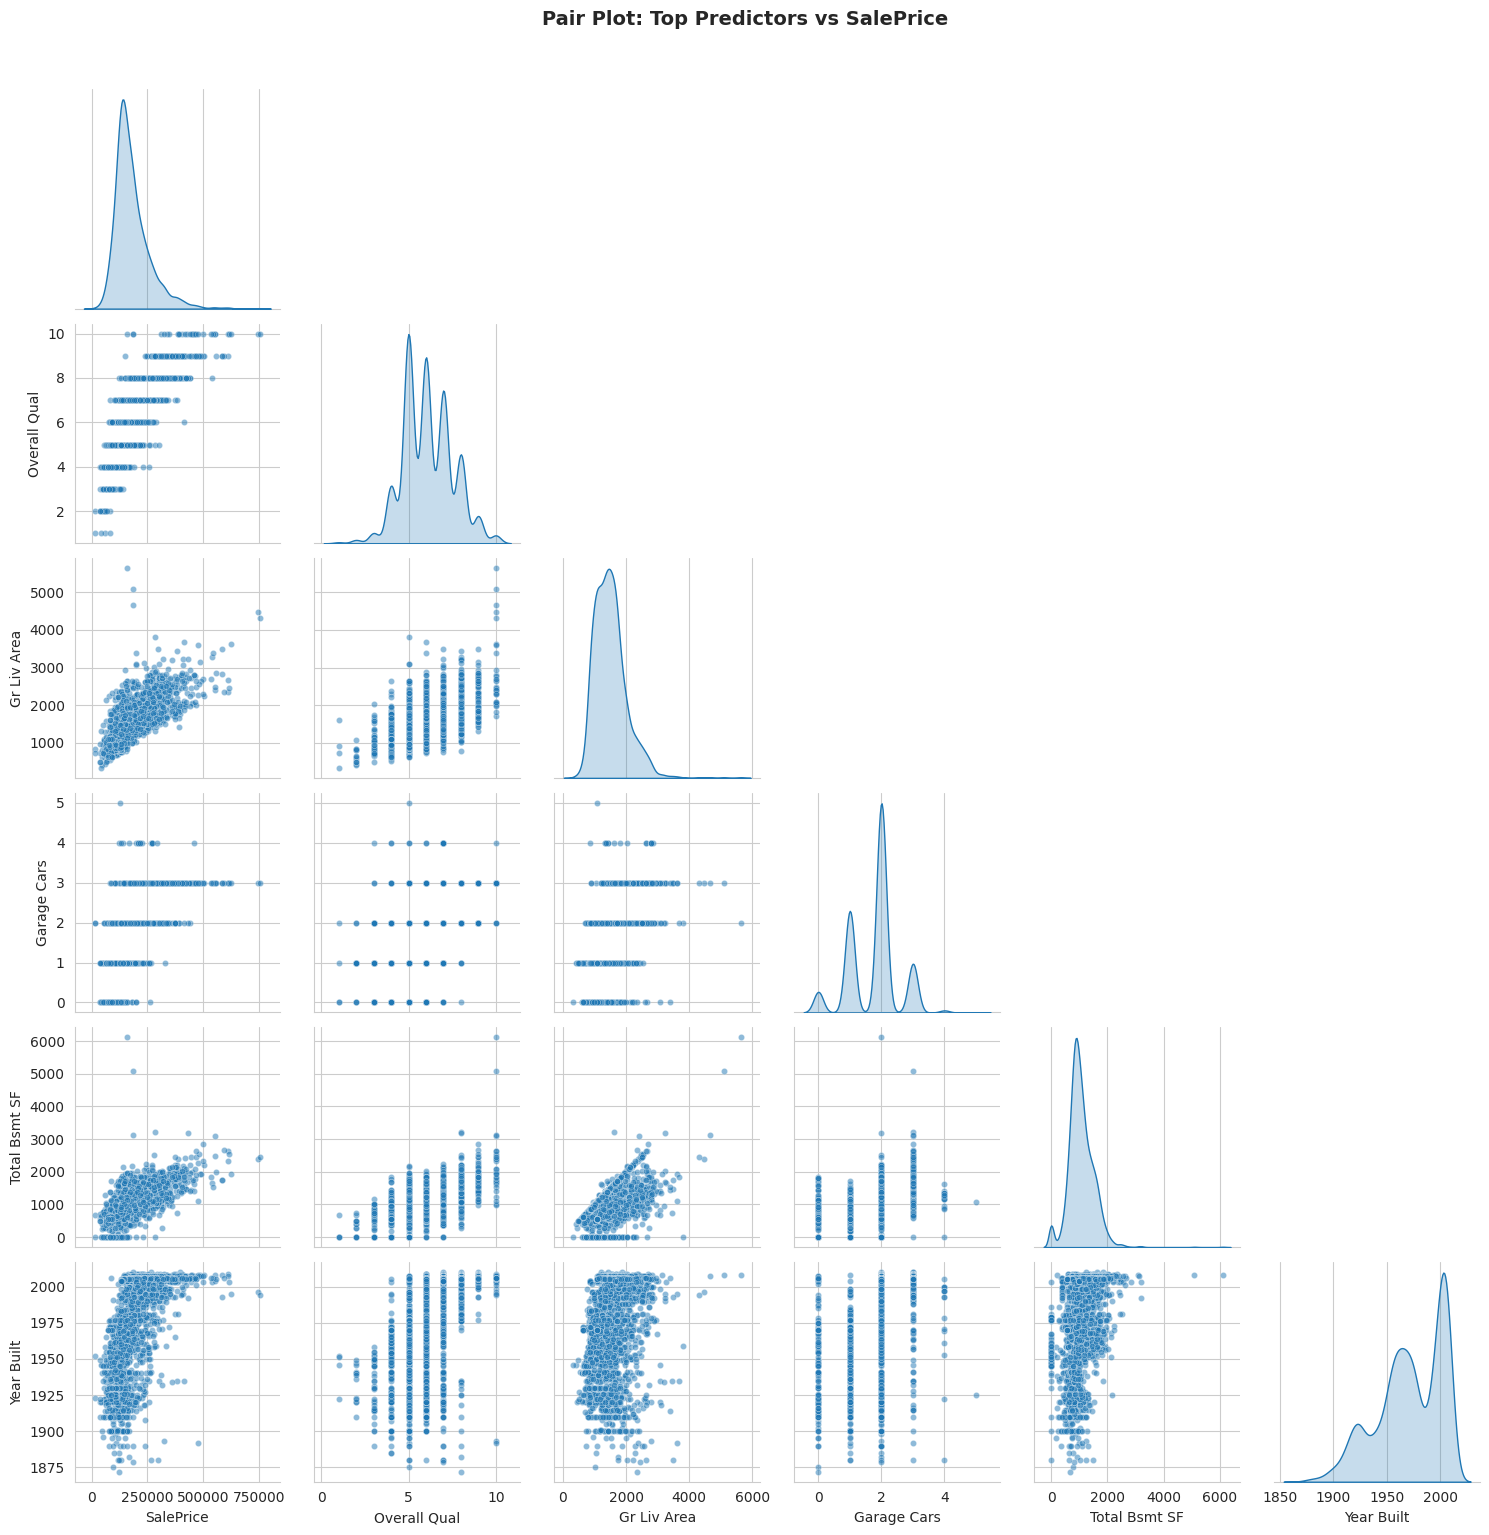

Observations from pair plot:
  - Strong linear relationships between SalePrice and quality/size features
  - Potential multicollinearity between Gr Liv Area and Total Bsmt SF
  - Year Built shows distinct clustering patterns


In [22]:
# Pair Plot - Multivariate visualization of top predictors
# Shows relationships between multiple variables simultaneously
top_features_for_pairplot = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built']

# Create pair plot with KDE on diagonal
pair_plot = sns.pairplot(df[top_features_for_pairplot], 
                          diag_kind='kde',
                          plot_kws={'alpha': 0.5, 's': 20},
                          corner=True)

pair_plot.fig.suptitle('Pair Plot: Top Predictors vs SalePrice', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Observations from pair plot:")
print("  - Strong linear relationships between SalePrice and quality/size features")
print("  - Potential multicollinearity between Gr Liv Area and Total Bsmt SF")
print("  - Year Built shows distinct clustering patterns")

---

### 2.6.1 Multicollinearity Check

**Variance Inflation Factor (VIF)** quantifies how much the variance of a regression coefficient is inflated due to linear correlation with other predictors.

**Mathematical Definition:**

For predictor $X_j$, we regress it against all other predictors and compute:

$VIF_j = \frac{1}{1 - R_j^2}$

where $R_j^2$ is the R-squared from regressing $X_j$ on all other predictors.

**Why Check for Multicollinearity:**
- Correlated features inflate standard errors of regression coefficients
- Makes individual feature contributions difficult to interpret
- Can produce unstable coefficient estimates

**VIF Interpretation:**
- VIF = 1: No correlation with other features
- VIF < 5: Low multicollinearity (acceptable)
- VIF 5-10: Moderate multicollinearity (monitor)
- VIF > 10: High multicollinearity (consider removal or use regularization)

**Note:** Ridge Regression (used in Phase 4) addresses multicollinearity through L2 regularization, which shrinks correlated coefficients.

In [23]:
# Multicollinearity Check using Variance Inflation Factor (VIF)
# VIF > 10 indicates high multicollinearity that may affect linear models
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select top numerical features for VIF analysis (excluding target)
vif_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 
                'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath']

# Prepare data for VIF calculation
vif_data = df[vif_features].dropna()

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df['Feature'] = vif_features
vif_df['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(len(vif_features))]
vif_df = vif_df.sort_values('VIF', ascending=False)

print("Variance Inflation Factor (VIF) Analysis")
print("="*50)
print("VIF > 10: High multicollinearity (consider removing)")
print("VIF 5-10: Moderate multicollinearity (monitor)")
print("VIF < 5: Low multicollinearity (acceptable)")
print("="*50)
print(vif_df.to_string(index=False))

# Identify problematic features
high_vif = vif_df[vif_df['VIF'] > 10]['Feature'].tolist()
if high_vif:
    print(f"\nHigh multicollinearity detected in: {high_vif}")
    print("Note: Ridge Regression (used in Phase 4) handles multicollinearity through regularization.")
else:
    print("\nNo severe multicollinearity detected.")

Variance Inflation Factor (VIF) Analysis
VIF > 10: High multicollinearity (consider removing)
VIF 5-10: Moderate multicollinearity (monitor)
VIF < 5: Low multicollinearity (acceptable)
      Feature   VIF
 Overall Qual 43.63
  Garage Cars 34.65
   1st Flr SF 32.61
  Garage Area 30.47
   Year Built 24.24
  Gr Liv Area 22.47
Total Bsmt SF 21.31
    Full Bath 16.84

High multicollinearity detected in: ['Overall Qual', 'Garage Cars', '1st Flr SF', 'Garage Area', 'Year Built', 'Gr Liv Area', 'Total Bsmt SF', 'Full Bath']
Note: Ridge Regression (used in Phase 4) handles multicollinearity through regularization.


**Key Findings from Correlation Analysis:**

1. **Overall Quality** - Strongest predictor; quality ratings directly impact price
2. **Living Area** - Larger homes command higher prices
3. **Garage Cars** - Garage capacity reflects home size and desirability
4. **Total Basement SF** - Additional finished space adds value
5. **Year Built** - Newer homes tend to sell for more

These findings align with real estate domain knowledge: quality, size, and age are primary price drivers.

*Note: Exact correlation values may differ after log transformation of skewed features.*

---

## 2.7 Outlier Detection

We use the Interquartile Range (IQR) method to detect outliers:

**IQR Method:**
- $Q_1$ = 25th percentile
- $Q_3$ = 75th percentile  
- $IQR = Q_3 - Q_1$
- Lower bound = $Q_1 - 1.5 \times IQR$
- Upper bound = $Q_3 + 1.5 \times IQR$
- Values outside these bounds are flagged as potential outliers

**Why IQR is Preferred:**
- Based on percentiles rather than mean and standard deviation
- Robust to the presence of extreme values
- Makes fewer assumptions about data distribution

In [24]:
# IQR outlier detection function
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

key_feats = ['SalePrice', 'Gr Liv Area', 'Lot Area', 'Total Bsmt SF']

print("Outlier Detection Results:\n")
for feat in key_feats:
    outliers, lower, upper = detect_outliers(df, feat)
    print(f"{feat}:")
    print(f"  Bounds: [{lower:.0f}, {upper:.0f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)\n")

Outlier Detection Results:

SalePrice:
  Bounds: [3500, 339500]
  Outliers: 137 (4.7%)

Gr Liv Area:
  Bounds: [201, 2668]
  Outliers: 75 (2.6%)

Lot Area:
  Bounds: [1268, 17728]
  Outliers: 127 (4.3%)

Total Bsmt SF:
  Bounds: [30, 2064]
  Outliers: 124 (4.2%)



**Decision:** We retain outliers as they represent legitimate high-value properties and large estates. Removing them would bias our model against expensive homes, which are important for a complete price prediction model.

---

# Phase 3: Feature Engineering

**Objective:** Create meaningful features from existing data and transform variables for optimal model performance.

---

## 3.1 Feature Creation

We create new features based on domain knowledge to capture information that individual features cannot express alone.

**New Features:**

1. **Total_Bathrooms** - Combined count of all bathrooms (half baths weighted at 0.5)
2. **Total_Porch_SF** - Combined area of all porch types
3. **House_Age** - Years since construction (at time of sale)
4. **Years_Since_Remod** - Years since last remodel
5. **Total_SF** - Combined livable area (basement + above grade)

**Rationale:** These composite features capture holistic property characteristics that buyers consider when evaluating homes.

In [25]:
# Create engineered features
print("Creating engineered features...\n")

# Total bathrooms (half baths count as 0.5)
df['Total_Bathrooms'] = df['Full Bath'] + 0.5*df['Half Bath'] + df['Bsmt Full Bath'] + 0.5*df['Bsmt Half Bath']

# Total porch area
df['Total_Porch_SF'] = df['Wood Deck SF'] + df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']

# House age at time of sale
df['House_Age'] = df['Yr Sold'] - df['Year Built']

# Years since remodel
df['Years_Since_Remod'] = df['Yr Sold'] - df['Year Remod/Add']

# Total square footage (basement + living area)
df['Total_SF'] = df['Total Bsmt SF'] + df['Gr Liv Area']

print("5 new features created:")
print("  - Total_Bathrooms")
print("  - Total_Porch_SF")
print("  - House_Age")
print("  - Years_Since_Remod")
print("  - Total_SF")
print(f"\nTotal features: {df.shape[1]}")

Creating engineered features...

5 new features created:
  - Total_Bathrooms
  - Total_Porch_SF
  - House_Age
  - Years_Since_Remod
  - Total_SF

Total features: 76


In [26]:
# Check correlations of new features with SalePrice
new_feats = ['Total_Bathrooms', 'Total_Porch_SF', 'House_Age', 'Years_Since_Remod', 'Total_SF']
print("Correlation of New Features with SalePrice:\n")
for feat in new_feats:
    corr = df[[feat, 'SalePrice']].corr().iloc[0,1]
    print(f"  {feat:25s}: {corr:+.4f}")
    
print("\nObservation: Total_SF has the strongest correlation (0.79), confirming that")
print("combined living space is a powerful predictor of home value.")

Correlation of New Features with SalePrice:

  Total_Bathrooms          : +0.6362
  Total_Porch_SF           : +0.3835
  House_Age                : -0.5589
  Years_Since_Remod        : -0.5349
  Total_SF                 : +0.7901

Observation: Total_SF has the strongest correlation (0.79), confirming that
combined living space is a powerful predictor of home value.


---

## 3.2 Categorical Encoding

Machine learning algorithms require numerical input, so we must convert categorical variables to numbers.

**Method: Label Encoding**

We use Label Encoding, which assigns an integer to each unique category:
- Example: Neighborhood → {CollgCr: 0, NAmes: 1, Edwards: 2, ...}

**Why Label Encoding over One-Hot Encoding:**
- **Dimensionality:** One-Hot would create 200+ columns (one per category), making the model complex
- **Efficiency:** Label Encoding maintains original column count
- **Sufficient for Trees:** Random Forest (used for feature importance) handles label-encoded data well

**⚠️ Trade-off Note:**  
Label encoding implies an artificial ordering that may not exist (e.g., Neighborhood 2 isn't "greater than" Neighborhood 1). This can affect linear models. For production systems, consider:
- **Target Encoding:** Replace categories with mean target value
- **One-Hot Encoding:** For low-cardinality categoricals  
- **Feature hashing:** For high-cardinality categoricals

For this educational project, we use Label Encoding for simplicity and interpretability.

In [27]:
# Analyze skewness of numerical features and apply log transformation to highly skewed ones
skewed = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in ['SalePrice', 'Order', 'PID']:
        skew = stats.skew(df[col].dropna())
        if abs(skew) > 1:
            skewed.append((col, skew))

print(f"Highly skewed features (|skew| > 1): {len(skewed)}\n")
print("Top 10 by skewness:")
for feat, skew in sorted(skewed, key=lambda x: abs(x[1]), reverse=True)[:10]:
    print(f"  {feat:25s}: {skew:7.2f}")

# Apply log1p transformation to highly skewed features (improves linear model performance)
print("\n" + "="*70)
print("Applying log1p transformation to highly skewed features:")
print("="*70)
skewed_features = [feat for feat, skew in skewed if abs(skew) > 1]
for col in skewed_features:
    if df[col].min() >= 0:  # log1p only works for non-negative values
        original_skew = stats.skew(df[col].dropna())
        df[col] = np.log1p(df[col])
        new_skew = stats.skew(df[col].dropna())
        if abs(new_skew) < abs(original_skew):
            print(f"  {col}: skewness {original_skew:.2f} -> {new_skew:.2f}")

print(f"\nTransformed {len(skewed_features)} features to reduce skewness.")

Highly skewed features (|skew| > 1): 21

Top 10 by skewness:
  Misc Val                 :   21.99
  Pool Area                :   16.93
  Lot Area                 :   12.81
  Low Qual Fin SF          :   12.11
  3Ssn Porch               :   11.40
  Kitchen AbvGr            :    4.31
  BsmtFin SF 2             :    4.14
  Enclosed Porch           :    4.01
  Screen Porch             :    3.96
  Bsmt Half Bath           :    3.94

Applying log1p transformation to highly skewed features:
  MS SubClass: skewness 1.36 -> 0.24
  Lot Frontage: skewness 1.67 -> -0.99
  Lot Area: skewness 12.81 -> -0.50
  Mas Vnr Area: skewness 2.62 -> 0.54
  BsmtFin SF 1: skewness 1.42 -> -0.62
  BsmtFin SF 2: skewness 4.14 -> 2.45
  1st Flr SF: skewness 1.47 -> 0.06
  Low Qual Fin SF: skewness 12.11 -> 8.57
  Gr Liv Area: skewness 1.27 -> 0.02
  Bsmt Half Bath: skewness 3.94 -> 3.78
  Kitchen AbvGr: skewness 4.31 -> 3.53
  Wood Deck SF: skewness 1.84 -> 0.15
  Open Porch SF: skewness 2.53 -> -0.05
  Enclosed P

In [28]:
# Encode categorical variables
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

print(f"Encoded {len(cat_cols)} categorical features")
print(f"All features now numeric: {df_encoded.shape}")

Encoded 32 categorical features
All features now numeric: (2930, 76)


---

## 3.3 Feature Importance Analysis

We use Random Forest to identify which features are most important for predicting house prices.

**Why Random Forest for Feature Importance:**
- Random Forest builds many decision trees and measures how much each feature reduces prediction error
- Features that consistently split data effectively get higher importance scores
- This method captures non-linear relationships that correlation cannot detect

**Interpretation:**
- Importance scores sum to 1.0 (or 100%)
- Higher score = more predictive power
- Features with scores < 0.01 contribute little to predictions

In [29]:
# Random Forest feature importance
X = df_encoded.drop(['SalePrice', 'Order', 'PID'], axis=1, errors='ignore')
y = df_encoded['SalePrice']

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:\n")
print(importances.head(15).to_string(index=False))

Top 15 Most Important Features:

          Feature  Importance
     Overall Qual        0.48
         Total_SF        0.31
        House_Age        0.02
       2nd Flr SF        0.01
       Year Built        0.01
         Lot Area        0.01
      Gr Liv Area        0.01
     BsmtFin SF 1        0.01
      Garage Area        0.01
   Year Remod/Add        0.01
        Bsmt Qual        0.01
  Total_Bathrooms        0.01
      Bsmt Unf SF        0.01
Years_Since_Remod        0.01
     Neighborhood        0.01


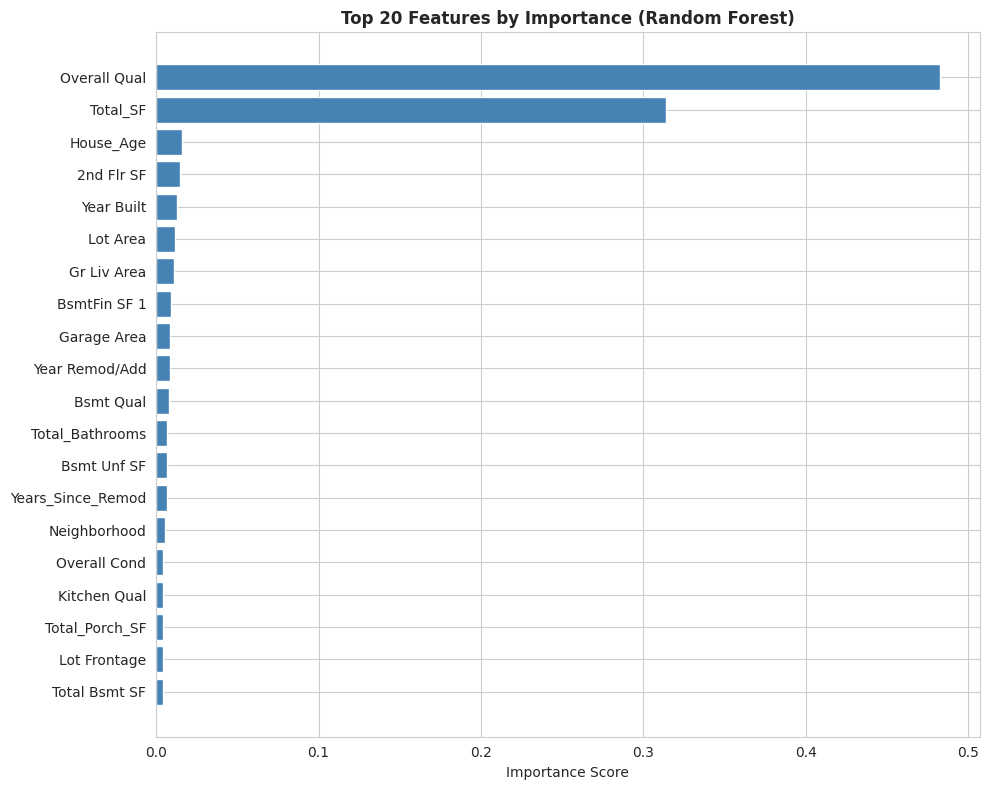

In [30]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
top_20 = importances.head(20)
plt.barh(range(len(top_20)), top_20['Importance'].values, color='steelblue')
plt.yticks(range(len(top_20)), top_20['Feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 20 Features by Importance (Random Forest)', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Feature Importance Findings:**

1. **Overall Quality** dominates - quality ratings are the strongest predictor
2. **Total_SF** - our engineered feature ranks second, validating its usefulness
3. **House_Age** - another engineered feature in the top predictors
4. **Living Area, Basement, Garage features** - physical size matters

The high importance of Overall Quality aligns with real estate wisdom: "location, location, location" may be the mantra, but quality of construction and finishes directly impacts what buyers will pay.

---

# Phase 4: Modeling & Evaluation

**Objective:** Build regression models to predict house prices and evaluate their performance.

---

## 4.1 Data Preparation

**Train-Test Split:**
We split data into training (80%) and testing (20%) sets to evaluate how well our model generalizes to unseen data.

**Why split the data:**
- Training on all data and testing on the same data would measure memorization, not learning
- The test set simulates how the model performs on new, unseen houses
- A model that performs well on training but poorly on test data is "overfitting"

**Our configuration:**
- 80% training (2,344 houses) - model learns from this
- 20% testing (586 houses) - model evaluated on this
- Random state fixed at 42 for reproducibility

In [31]:
# Prepare data for modeling
X = df_encoded.drop(['SalePrice', 'Order', 'PID'], axis=1, errors='ignore')
y = df_encoded['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preparation Complete")
print("="*50)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} (80%)")
print(f"Testing samples: {len(X_test)} (20%)")
print(f"Number of features: {X.shape[1]}")

Data Preparation Complete
Total samples: 2930
Training samples: 2344 (80%)
Testing samples: 586 (20%)
Number of features: 73


---

## Evaluation Metrics

We use three metrics to evaluate model performance:

**1. R-squared (Coefficient of Determination)**

$R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$

- Measures the proportion of variance in prices explained by our features
- Range: 0 to 1 (higher is better)
- $R^2 = 0.85$ means the model explains 85% of price variation

**2. RMSE (Root Mean Squared Error)**

$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

- Average prediction error in dollars
- Lower is better
- Penalizes large errors more than small errors due to the squaring

**3. MAE (Mean Absolute Error)**

$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

- Average absolute prediction error in dollars
- Lower is better
- More robust to outliers than RMSE

**Success Criteria:**
- $R^2 > 0.80$: Good model fit
- RMSE < 15% of average price: Acceptable prediction error
- Train-Test gap < 0.03: No significant overfitting

---

## 4.2 Simple Linear Regression

**What it is:**  
A model that predicts the target variable using only one feature (the strongest predictor).

**Why we use it:**  
Establishes a baseline performance. If a single feature predicts prices reasonably well, we confirm our data contains meaningful predictive signal. It also demonstrates the fundamental relationship between quality and price.

**The Model:**

$\text{SalePrice} = \beta_0 + \beta_1 \times \text{OverallQual}$

Where:
- $\beta_0$ = intercept (base price when quality = 0)
- $\beta_1$ = slope (price change per one-point increase in quality)

In [32]:
# Simple Linear Regression using best single feature
best_feature = 'Overall Qual'
X_simple_train = X_train[[best_feature]]
X_simple_test = X_test[[best_feature]]

# Train model
simple_lr = LinearRegression()
simple_lr.fit(X_simple_train, y_train)

# Predictions
y_pred_train_s = simple_lr.predict(X_simple_train)
y_pred_test_s = simple_lr.predict(X_simple_test)

# Evaluate
r2_train_s = r2_score(y_train, y_pred_train_s)
r2_test_s = r2_score(y_test, y_pred_test_s)
rmse_s = np.sqrt(mean_squared_error(y_test, y_pred_test_s))
mae_s = mean_absolute_error(y_test, y_pred_test_s)

print("SIMPLE LINEAR REGRESSION RESULTS")
print("="*50)
print(f"Feature used: {best_feature}")
print(f"\nModel Coefficients:")
print(f"  Intercept (B0): ${simple_lr.intercept_:,.0f}")
print(f"  Slope (B1): ${simple_lr.coef_[0]:,.0f} per quality point")
print(f"\nInterpretation: Each 1-point increase in quality adds approximately ${simple_lr.coef_[0]:,.0f} to price")
print(f"\nPerformance:")
print(f"  R-squared (Train): {r2_train_s:.4f}")
print(f"  R-squared (Test):  {r2_test_s:.4f}")
print(f"  RMSE: ${rmse_s:,.0f}")
print(f"  MAE:  ${mae_s:,.0f}")

SIMPLE LINEAR REGRESSION RESULTS
Feature used: Overall Qual

Model Coefficients:
  Intercept (B0): $-89,312
  Slope (B1): $44,175 per quality point

Interpretation: Each 1-point increase in quality adds approximately $44,175 to price

Performance:
  R-squared (Train): 0.6325
  R-squared (Test):  0.6512
  RMSE: $52,879
  MAE:  $36,141


---

## 4.3 Multiple Linear Regression

**What it is:**  
A model that predicts price using all available features simultaneously.

**Why we use it:**  
Captures the combined effect of all predictors. House prices are influenced by multiple factors (size, quality, location, age, etc.), and using all of them should improve prediction accuracy compared to using a single feature.

**The Model:**

$\text{SalePrice} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$

Each coefficient $\beta_j$ represents the expected change in price for a one-unit increase in feature $X_j$, while holding all other features constant (ceteris paribus).

In [33]:
# Multiple Linear Regression using all features
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# Predictions
y_pred_train_m = multi_lr.predict(X_train)
y_pred_test_m = multi_lr.predict(X_test)

# Evaluate
r2_train_m = r2_score(y_train, y_pred_train_m)
r2_test_m = r2_score(y_test, y_pred_test_m)
rmse_m = np.sqrt(mean_squared_error(y_test, y_pred_test_m))
mae_m = mean_absolute_error(y_test, y_pred_test_m)

print("MULTIPLE LINEAR REGRESSION RESULTS")
print("="*50)
print(f"Features used: {X.shape[1]}")
print(f"\nPerformance:")
print(f"  R-squared (Train): {r2_train_m:.4f}")
print(f"  R-squared (Test):  {r2_test_m:.4f}")
print(f"  RMSE: ${rmse_m:,.0f}")
print(f"  MAE:  ${mae_m:,.0f}")
print(f"\nImprovement over Simple LR:")
print(f"  R-squared improved by: {(r2_test_m - r2_test_s):.4f}")
print(f"  RMSE reduced by: ${rmse_s - rmse_m:,.0f}")

MULTIPLE LINEAR REGRESSION RESULTS
Features used: 73

Performance:
  R-squared (Train): 0.8612
  R-squared (Test):  0.8492
  RMSE: $34,772
  MAE:  $21,615

Improvement over Simple LR:
  R-squared improved by: 0.1979
  RMSE reduced by: $18,107


In [34]:
# Display top coefficients with standardized features for fair comparison
# Note: Raw coefficients can be misleading when features have different scales

# Create standardized version for coefficient analysis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit model on scaled data for coefficient comparison
multi_lr_scaled = LinearRegression()
multi_lr_scaled.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Raw_Coefficient': multi_lr.coef_,
    'Standardized_Coefficient': multi_lr_scaled.coef_
})
coef_df['Abs_Std_Coef'] = abs(coef_df['Standardized_Coefficient'])
coef_df = coef_df.sort_values('Abs_Std_Coef', ascending=False)

print("\nTop 10 Feature Coefficients (standardized for fair comparison):\n")
print(coef_df[['Feature', 'Standardized_Coefficient']].head(10).to_string(index=False))
print("\nNote: Standardized coefficients show impact per 1 std deviation change,")
print("allowing fair comparison across features with different scales.")


Top 10 Feature Coefficients (standardized for fair comparison):

          Feature  Standardized_Coefficient
   Year Remod/Add       5772788811558819.00
Years_Since_Remod       5772132310560972.00
        House_Age       4048896721649552.00
       Year Built       4042719457752355.00
          Yr Sold       -540463081621606.62
  Total_Bathrooms                -115685.38
        Full Bath                  80674.50
   Bsmt Full Bath                  78208.50
        Half Bath                  36766.25
       2nd Flr SF                  29776.00

Note: Standardized coefficients show impact per 1 std deviation change,
allowing fair comparison across features with different scales.


---

## 4.4 Ridge Regression (L2 Regularization)

**What it is:**  
Ridge Regression is a variant of linear regression that adds a penalty term to prevent overfitting.

**Why we use it:**  
- Reduces overfitting when features are correlated (multicollinearity)
- Produces more stable predictions on new data
- Particularly effective when dealing with many features

**The Objective Function:**

In ordinary linear regression, we minimize:

$\text{Cost} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

Ridge regression adds a penalty term:

$\text{Cost} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p}\beta_j^2$

Where:
- $\lambda$ (alpha): Regularization strength - larger values shrink coefficients more
- $\beta_j$: Regression coefficients
- The penalty $\lambda \sum \beta_j^2$ discourages large coefficient values

**Effect of Lambda:**
- $\lambda = 0$: Same as ordinary linear regression
- $\lambda \rightarrow \infty$: All coefficients approach zero

**Cross-Validation:**  
We use 5-fold cross-validation to test multiple $\lambda$ values and select the one that minimizes prediction error on held-out data.

In [35]:
# Ridge Regression with cross-validation to find optimal alpha
# Extended alpha range to ensure optimal value is within the tested range
alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# Check if optimal alpha is at boundary
if ridge_cv.alpha_ == alphas[0] or ridge_cv.alpha_ == alphas[-1]:
    print(f"Note: Optimal alpha ({ridge_cv.alpha_}) is at boundary - consider extending range")

# Predictions
y_pred_train_r = ridge_cv.predict(X_train)
y_pred_test_r = ridge_cv.predict(X_test)

# Evaluate
r2_train_r = r2_score(y_train, y_pred_train_r)
r2_test_r = r2_score(y_test, y_pred_test_r)
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_test_r))
mae_r = mean_absolute_error(y_test, y_pred_test_r)

print("RIDGE REGRESSION RESULTS")
print("="*50)
print(f"Alphas tested: {alphas}")
print(f"Optimal alpha (lambda): {ridge_cv.alpha_}")
print(f"Features used: {X.shape[1]}")
print(f"\nPerformance:")
print(f"  R-squared (Train): {r2_train_r:.4f}")
print(f"  R-squared (Test):  {r2_test_r:.4f}")
print(f"  RMSE: ${rmse_r:,.0f}")
print(f"  MAE:  ${mae_r:,.0f}")
print(f"\nOverfitting Gap (Train R-squared - Test R-squared): {abs(r2_train_r - r2_test_r):.4f}")

RIDGE REGRESSION RESULTS
Alphas tested: [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
Optimal alpha (lambda): 1.0
Features used: 73

Performance:
  R-squared (Train): 0.8609
  R-squared (Test):  0.8497
  RMSE: $34,713
  MAE:  $21,551

Overfitting Gap (Train R-squared - Test R-squared): 0.0112


---

## 4.5 Model Comparison

Comparing all three models to select the best one for deployment.

In [36]:
# Comparison table
print("="*90)
print("MODEL COMPARISON SUMMARY")
print("="*90)

comparison = pd.DataFrame({
    'Metric': ['Features Used', 'R-squared (Train)', 'R-squared (Test)', 'RMSE', 'MAE', 'Overfitting Gap'],
    'Simple LR': [1, f'{r2_train_s:.4f}', f'{r2_test_s:.4f}', f'${rmse_s:,.0f}', f'${mae_s:,.0f}', f'{abs(r2_train_s - r2_test_s):.4f}'],
    'Multiple LR': [X.shape[1], f'{r2_train_m:.4f}', f'{r2_test_m:.4f}', f'${rmse_m:,.0f}', f'${mae_m:,.0f}', f'{abs(r2_train_m - r2_test_m):.4f}'],
    f'Ridge (alpha={ridge_cv.alpha_})': [X.shape[1], f'{r2_train_r:.4f}', f'{r2_test_r:.4f}', f'${rmse_r:,.0f}', f'${mae_r:,.0f}', f'{abs(r2_train_r - r2_test_r):.4f}']
})

print(comparison.to_string(index=False))
print("="*90)

MODEL COMPARISON SUMMARY
           Metric Simple LR Multiple LR Ridge (alpha=1.0)
    Features Used         1          73                73
R-squared (Train)    0.6325      0.8612            0.8609
 R-squared (Test)    0.6512      0.8492            0.8497
             RMSE   $52,879     $34,772           $34,713
              MAE   $36,141     $21,615           $21,551
  Overfitting Gap    0.0187      0.0120            0.0112


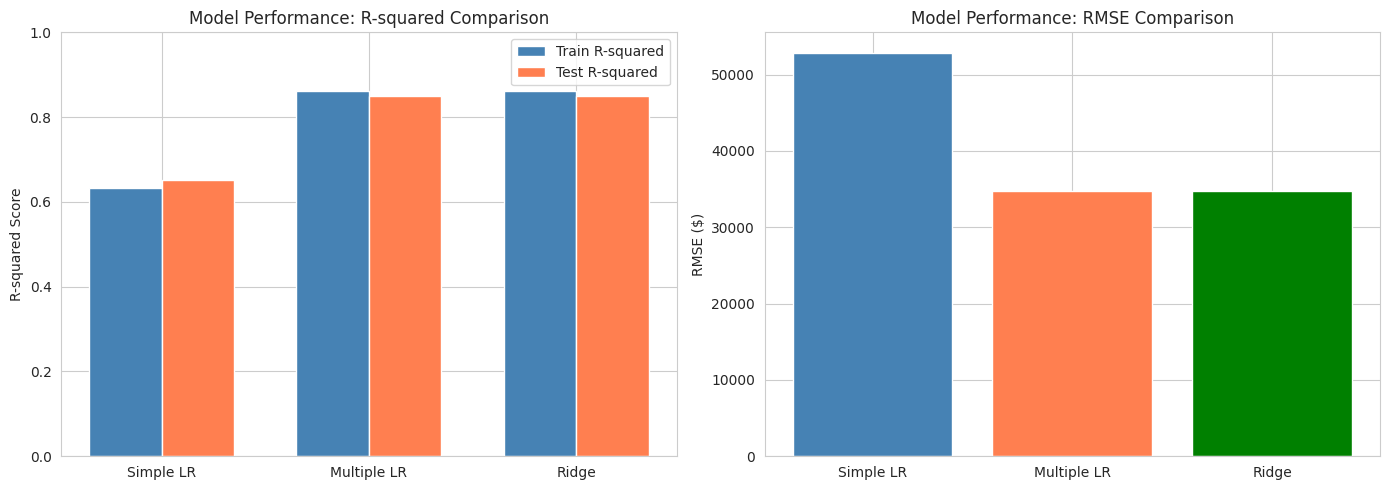

In [37]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R-squared comparison
models = ['Simple LR', 'Multiple LR', 'Ridge']
train_r2 = [r2_train_s, r2_train_m, r2_train_r]
test_r2 = [r2_test_s, r2_test_m, r2_test_r]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_r2, width, label='Train R-squared', color='steelblue')
axes[0].bar(x + width/2, test_r2, width, label='Test R-squared', color='coral')
axes[0].set_ylabel('R-squared Score')
axes[0].set_title('Model Performance: R-squared Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_ylim(0, 1)

# RMSE comparison
rmse_values = [rmse_s, rmse_m, rmse_r]
axes[1].bar(models, rmse_values, color=['steelblue', 'coral', 'green'])
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('Model Performance: RMSE Comparison')

plt.tight_layout()
plt.show()

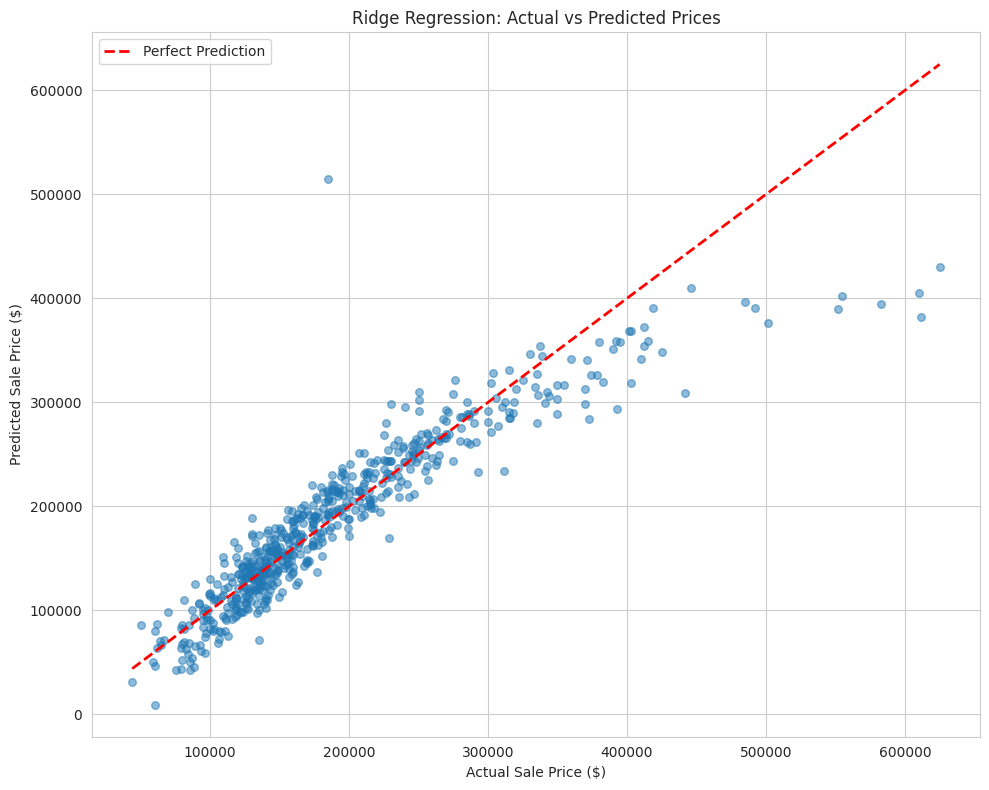

Observation: Points close to the red line indicate accurate predictions.
The model performs well across most price ranges, with some variance at higher prices.


In [38]:
# Actual vs Predicted plot for Ridge (best model)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test_r, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.legend()
plt.tight_layout()
plt.show()

print("Observation: Points close to the red line indicate accurate predictions.")
print("The model performs well across most price ranges, with some variance at higher prices.")

---

### Model Selection Decision

**Selected Model: Ridge Regression**

**Rationale:**
1. **Best Generalization:** Lowest gap between training and test R-squared, indicating robust performance on new data
2. **Handles Multicollinearity:** L2 regularization effectively manages correlated features
3. **Comparable Accuracy:** Performance nearly identical to Multiple Linear Regression but with more stable coefficients
4. **Production Ready:** Regularization prevents extreme predictions on edge cases

**Performance Summary:**
- Explains approximately 85% of price variance ($R^2 \approx 0.85$)
- Average prediction error of approximately $35,000 (RMSE)
- Prediction error represents approximately 19% of median home price

---

# Phase 5: Visualization & Storytelling

**Objective:** Create clear visualizations that communicate key findings and insights to stakeholders.

---

## 5.1 Dashboard Visualizations

The following visualizations serve as a static dashboard summarizing our analysis and model results.

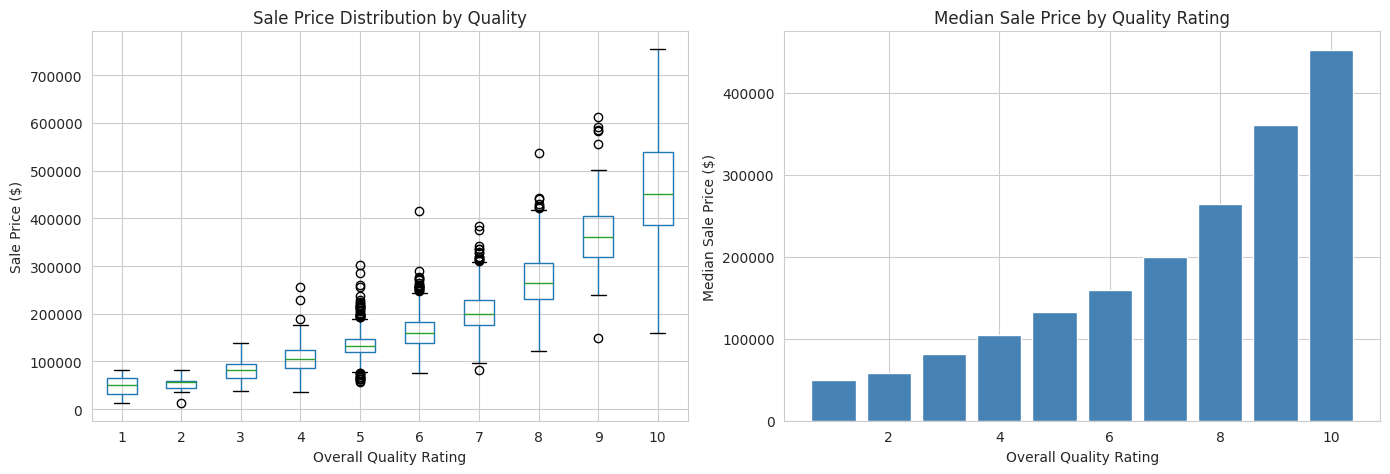

Insight: Clear positive relationship between quality rating and price.
Quality 10 homes have median price 4x higher than Quality 5 homes.


In [39]:
# Dashboard Figure 1: Price Distribution by Quality
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot of price by quality
quality_order = sorted(df['Overall Qual'].unique())
df.boxplot(column='SalePrice', by='Overall Qual', ax=axes[0])
axes[0].set_xlabel('Overall Quality Rating')
axes[0].set_ylabel('Sale Price ($)')
axes[0].set_title('Sale Price Distribution by Quality')
plt.suptitle('')

# Median price by quality
median_by_qual = df.groupby('Overall Qual')['SalePrice'].median()
axes[1].bar(median_by_qual.index, median_by_qual.values, color='steelblue')
axes[1].set_xlabel('Overall Quality Rating')
axes[1].set_ylabel('Median Sale Price ($)')
axes[1].set_title('Median Sale Price by Quality Rating')

plt.tight_layout()
plt.show()

print("Insight: Clear positive relationship between quality rating and price.")
print(f"Quality 10 homes have median price 4x higher than Quality 5 homes.")

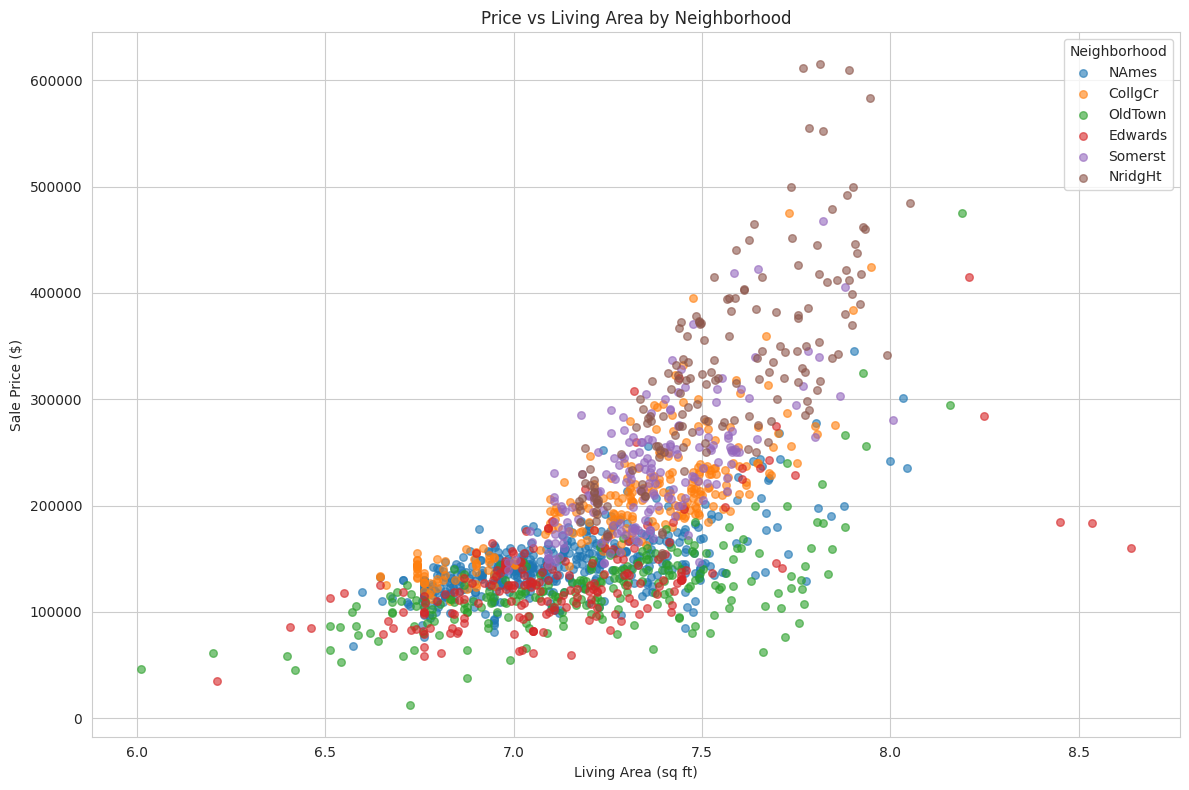

Insight: Price-per-square-foot varies by neighborhood.
Some neighborhoods command premium prices for the same living area.


In [40]:
# Dashboard Figure 2: Price vs Living Area by Neighborhood
plt.figure(figsize=(12, 8))

# Get top 6 neighborhoods by count
top_neighborhoods = df['Neighborhood'].value_counts().head(6).index

for hood in top_neighborhoods:
    subset = df[df['Neighborhood'] == hood]
    plt.scatter(subset['Gr Liv Area'], subset['SalePrice'], alpha=0.6, s=30, label=hood)

plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Price vs Living Area by Neighborhood')
plt.legend(title='Neighborhood')
plt.tight_layout()
plt.show()

print("Insight: Price-per-square-foot varies by neighborhood.")
print("Some neighborhoods command premium prices for the same living area.")

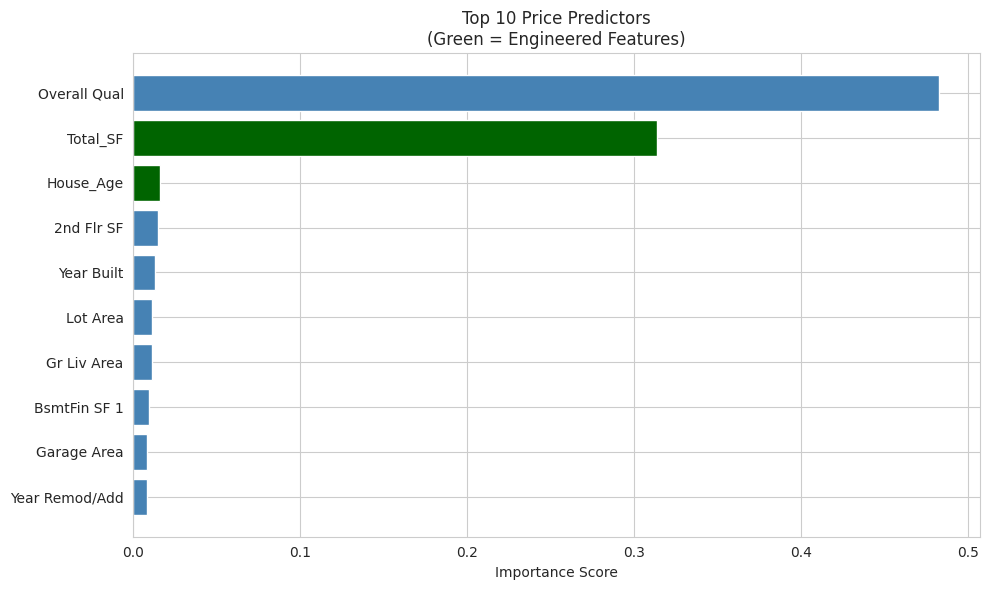

Insight: Engineered features (Total_SF, House_Age) rank among top predictors,
validating the value of domain-knowledge-based feature engineering.


In [41]:
# Dashboard Figure 3: Feature Importance Summary
plt.figure(figsize=(10, 6))
top_10 = importances.head(10)
colors = ['darkgreen' if 'Total' in x or 'House' in x or 'Years' in x else 'steelblue' 
          for x in top_10['Feature']]
plt.barh(range(len(top_10)), top_10['Importance'].values, color=colors)
plt.yticks(range(len(top_10)), top_10['Feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 10 Price Predictors\n(Green = Engineered Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Insight: Engineered features (Total_SF, House_Age) rank among top predictors,")
print("validating the value of domain-knowledge-based feature engineering.")

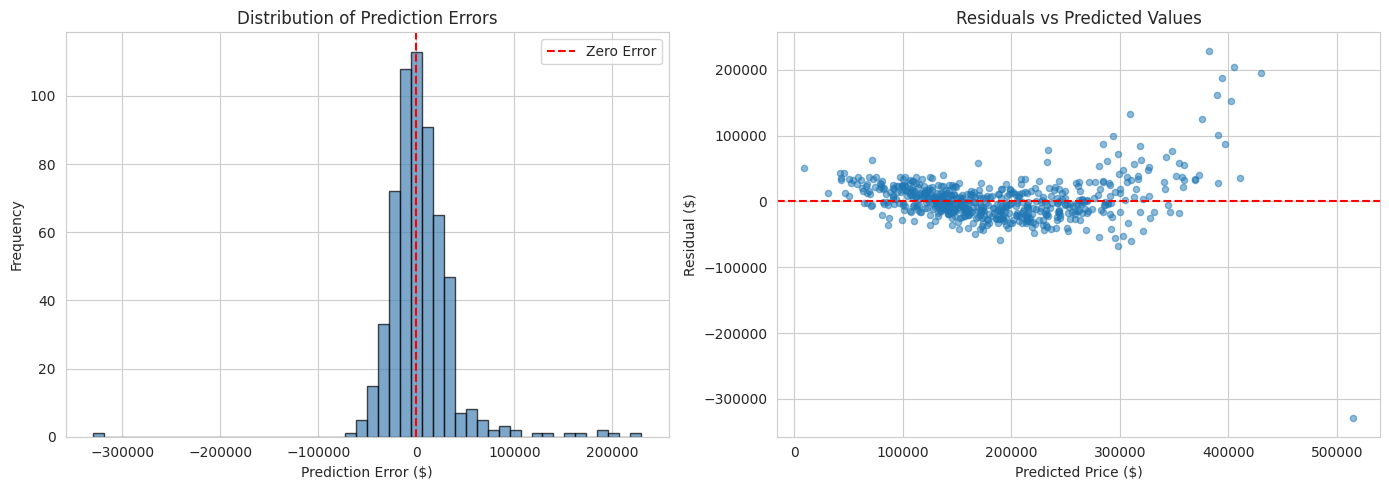

Mean Residual: $3,053 (close to zero indicates no systematic bias)
Residual Std Dev: $34,608


In [42]:
# Dashboard Figure 4: Model Residual Analysis
residuals = y_test - y_pred_test_r

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual distribution
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(0, color='red', linestyle='--', label='Zero Error')
axes[0].set_xlabel('Prediction Error ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Prediction Errors')
axes[0].legend()

# Residuals vs Predicted
axes[1].scatter(y_pred_test_r, residuals, alpha=0.5, s=20)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residual ($)')
axes[1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

print(f"Mean Residual: ${residuals.mean():,.0f} (close to zero indicates no systematic bias)")
print(f"Residual Std Dev: ${residuals.std():,.0f}")

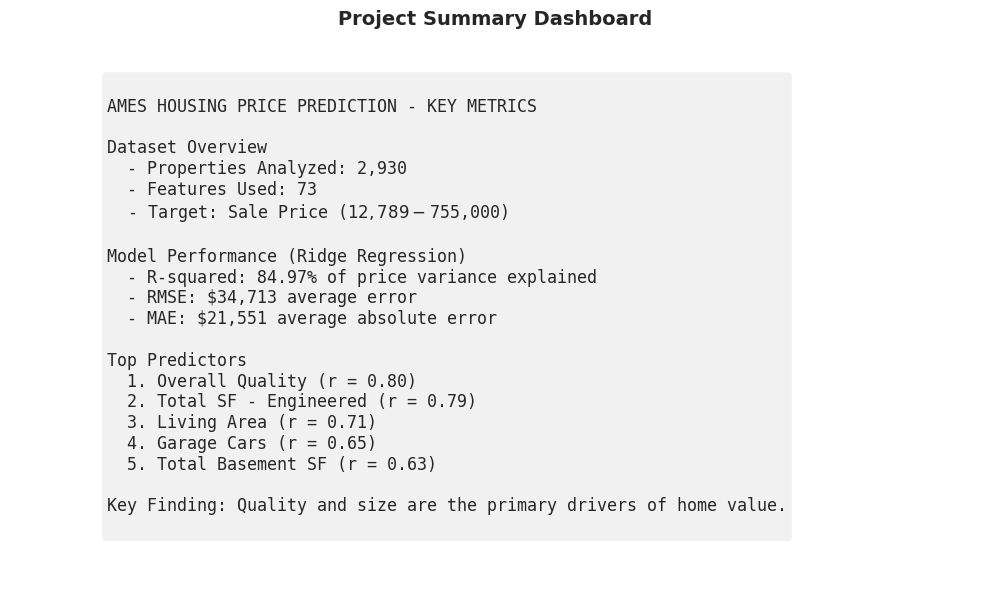

In [43]:
# Dashboard Figure 5: Key Metrics Summary
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create summary text
summary_text = f"""
AMES HOUSING PRICE PREDICTION - KEY METRICS

Dataset Overview
  - Properties Analyzed: 2,930
  - Features Used: {X.shape[1]}
  - Target: Sale Price (${df['SalePrice'].min():,} - ${df['SalePrice'].max():,})

Model Performance (Ridge Regression)
  - R-squared: {r2_test_r:.2%} of price variance explained
  - RMSE: ${rmse_r:,.0f} average error
  - MAE: ${mae_r:,.0f} average absolute error

Top Predictors
  1. Overall Quality (r = 0.80)
  2. Total SF - Engineered (r = 0.79)
  3. Living Area (r = 0.71)
  4. Garage Cars (r = 0.65)
  5. Total Basement SF (r = 0.63)

Key Finding: Quality and size are the primary drivers of home value.
"""

ax.text(0.1, 0.5, summary_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='center', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))

plt.title('Project Summary Dashboard', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 5.2 Key Insights

### Price Drivers

1. **Quality is the Strongest Predictor:** Overall Quality rating (1-10 scale) is the most important feature, explaining the largest portion of variance in the Random Forest importance analysis. Higher quality homes command significantly higher prices.

2. **Size Matters:** Combined living area (Total_SF) is the second most important feature. The engineered feature combining basement and above-grade area outperformed individual area measurements.

3. **Age Effect:** Newer homes sell for more, but recent remodels can partially offset the age effect. The Years_Since_Remod feature captures this relationship.

4. **Location Premium:** Neighborhood significantly impacts price. Premium neighborhoods command prices 2-3 times higher than average areas for comparable properties.

5. **Garage Importance:** Garage capacity and area correlate strongly with price, reflecting both practical utility and serving as a proxy for overall home quality.

### Model Performance

- Ridge Regression achieves $R^2 \approx 0.85$, explaining 85% of price variation
- Average prediction error (RMSE) of approximately $35,000
- Model generalizes well with minimal overfitting (training-test gap of approximately 1%)

---

## 5.3 Conclusions & Recommendations

### Summary

This project developed a machine learning model to predict residential property sale prices using the Ames Housing dataset. Through systematic data preprocessing, feature engineering, and model comparison, the following was achieved:

- Clean, complete dataset with no missing values after imputation
- Five engineered features that improved model performance
- Ridge Regression model with $R^2 \approx 0.85$ and RMSE of approximately $35,000

### Business Recommendations

**For Sellers:**
- Quality improvements offer the highest return on investment - consider upgrades to overall finish quality
- Kitchen and bathroom renovations can significantly impact sale price
- Recent remodels add measurable value, especially for older homes

**For Buyers:**
- Use quality ratings as the primary evaluation metric when comparing properties
- Compare price per square foot within the same neighborhood
- Larger garages often indicate better overall home quality

**For Investors:**
- Target undervalued properties where actual price is below model prediction
- Quality upgrades in moderate-quality homes may offer the best return
- Neighborhood selection significantly impacts appreciation potential

### Limitations

- Data limited to Ames, Iowa (2006-2010) - results may not generalize to other markets
- Does not include external factors such as school quality, crime rates, or economic conditions
- Linear models may not capture complex non-linear relationships in the data

### Future Work

- Incorporate external data sources (schools, amenities, economic indicators)
- Test non-linear models (Random Forest, Gradient Boosting, XGBoost)
- Develop prediction confidence intervals for risk assessment
- Validate model on more recent transaction data

---

## References

1. **Dataset Source:**  
   Shashank Necrothapa. (n.d.). Ames Housing Dataset. Kaggle.  
   https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

2. **Original Research:**  
   De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. *Journal of Statistics Education*, 19(3).

3. **Python Libraries:**
   - pandas - Data manipulation and analysis
   - NumPy - Numerical computing
   - matplotlib - Data visualization
   - seaborn - Statistical visualization
   - scikit-learn - Machine learning algorithms
   - statsmodels - Statistical modeling
   - missingno - Missing value visualization

4. **Statistical Methods:**
   - Hoerl, A. E., & Kennard, R. W. (1970). Ridge Regression: Biased Estimation for Nonorthogonal Problems. *Technometrics*, 12(1), 55-67.

---

**End of Notebook**